### Média de cada disciplina nos municípios brasileiros

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
colunas = ['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 
            'NU_NOTA_REDACAO','NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']

In [3]:
#Abrindo o dataset
microdadosEnem = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1',usecols=colunas)
microdadosEnem.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1506807,Santarém,15,PA,472.9,466.0,497.3,369.1,780.0
1,1504059,Mãe do Rio,15,PA,358.9,495.4,482.3,416.5,600.0
2,1505502,Paragominas,15,PA,574.2,538.7,582.6,571.5,640.0
3,1507706,São Sebastião da Boa Vista,15,PA,NaN,NaN,NaN,NaN,NaN
4,1503903,Juruti,15,PA,NaN,NaN,NaN,NaN,NaN


In [4]:
#Atribuindo o valor de colunasSelecionadas (Será igual à variável colunas)
colunasSelecionadas = colunas
microdadosEnemSelecionados =  microdadosEnem.filter(items=colunasSelecionadas).dropna() 
microdadosEnemSelecionados.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,1506807,Santarém,15,PA,780.0,369.1,472.9,466.0,497.3
1,1504059,Mãe do Rio,15,PA,600.0,416.5,358.9,495.4,482.3
2,1505502,Paragominas,15,PA,640.0,571.5,574.2,538.7,582.6
5,1500800,Ananindeua,15,PA,580.0,605.3,522.0,592.6,582.0
6,1504208,Marabá,15,PA,360.0,581.5,407.4,480.1,464.3


In [5]:
#Média de cada prova de todos os municípios
media = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_MUNICIPIO_RESIDENCIA','NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC'])\
                        .groupby(['NO_MUNICIPIO_RESIDENCIA'])\
                        .mean()

media.head(10)

,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
NO_MUNICIPIO_RESIDENCIA,,,,,
Abadia de Goiás,559.234973,499.255738,461.149180,494.180328,509.515301
Abadia dos Dourados,624.324324,519.402703,479.572072,513.445946,520.509009
Abadiânia,606.542056,523.014019,468.572897,499.850935,522.542056
Abaetetuba,571.766315,474.762857,450.108617,477.424697,490.741950
Abaeté,615.604396,559.078297,498.019231,525.397253,536.238736
Abaiara,619.126638,483.317904,446.445415,476.008297,492.310044
Abaré,466.810811,457.280811,423.915946,452.418919,468.452703
Abatiá,515.517241,516.767241,471.268966,514.520690,519.755172
Abaíra,618.484848,525.883333,473.704545,507.583333,520.792424


In [6]:
#Selecionando Municípios
sp = media.loc['São Paulo']
rj = media.loc['Rio de Janeiro']
niteroi = media.loc['Niterói']
sjc = media.loc['São José dos Campos']
parnaiba = media.loc['Parnaíba']
jacarei = media.loc['Jacareí']
manaus = media.loc['Manaus']
sao_luis = media.loc['São Luís']

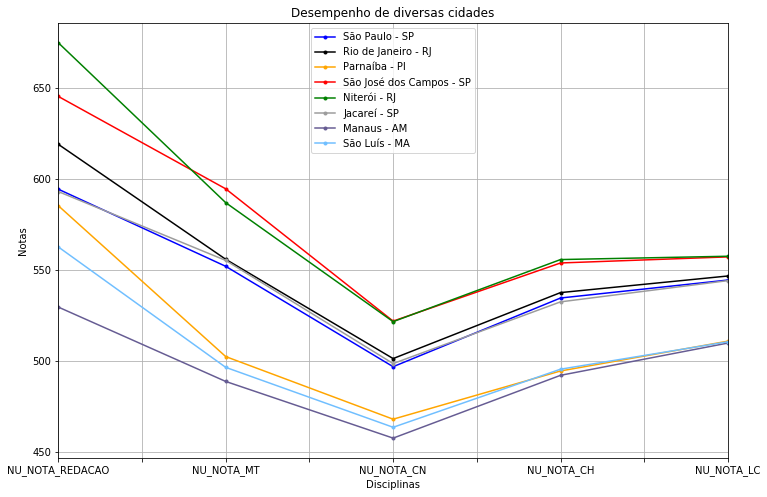

In [7]:
#Comparação entre as cidades
plt.figure(figsize=(12, 8))
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.title('Desempenho de diversas cidades')
sp.plot(color='blue',label='São Paulo - SP',marker='.')
rj.plot(color='black',label='Rio de Janeiro - RJ',marker='.')
parnaiba.plot(color='orange',label='Parnaíba - PI',marker='.')
sjc.plot(color='red', label='São José dos Campos - SP',marker='.')
niteroi.plot(color='green', label='Niterói - RJ',marker='.')
jacarei.plot(color='#9c9c9c',label='Jacareí - SP',marker='.')
manaus.plot(color='#665c93', label='Manaus - AM',marker='.')
sao_luis.plot(color='#70bfff',label='São Luís - MA',marker='.')
plt.grid(True)
plt.legend(loc=9) #localização da legenda
print()

In [8]:
#Salvando todos os dados que me interessam em .csv
mediaMunicipios = microdadosEnemSelecionados.groupby(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
                                                       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA'], as_index=False).mean()
mediaMunicipios

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC
0,1100015,Alta Floresta D'Oeste,11,RO,562.287234,503.024468,467.092819,495.192553,506.729255
1,1100023,Ariquemes,11,RO,535.417025,499.166337,463.640456,494.021582,509.741273
2,1100031,Cabixi,11,RO,503.437500,497.443750,454.453125,476.479688,490.650000
3,1100049,Cacoal,11,RO,546.793558,510.874488,469.204832,496.843997,511.780710
4,1100056,Cerejeiras,11,RO,556.301370,505.175685,468.381164,491.672945,508.293493
5,1100064,Colorado do Oeste,11,RO,538.681319,506.545421,468.127106,496.983883,508.650549
6,1100072,Corumbiara,11,RO,539.310345,487.541379,465.974138,482.215517,490.650000
7,1100080,Costa Marques,11,RO,473.664596,467.216149,430.523602,465.131056,481.335404
8,1100098,Espigão D'Oeste,11,RO,541.056000,508.255040,465.351360,497.830240,505.199040
9,1100106,Guajará-Mirim,11,RO,473.518268,466.414817,438.817185,466.941813,488.018403


In [9]:
#Salvando o dataframe em .csv
mediaMunicipios.to_csv('mediaMunicipios2019.csv')